In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv('education2020.csv')

전반적인 데이터 확인

In [61]:
df

,Unnamed: 0,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house,education_year
0,0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2,16
1,1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3,21
2,2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2,6
3,3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2,12
4,4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,18059,2020,G2,993800291,1,42,3,6,2,6705,2200,179,-390,NaN,NaN,3,16
18060,18060,2020,G2,994800251,1,49,5,6,2,130180,22000,15454,11784,O,3,1,16
18061,18061,2020,G2,994800261,1,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1,16
18062,18062,2020,G2,994800291,2,53,2,7,4,109695,25000,9114,7074,O,2,2,18


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      18064 non-null  int64 
 1   year            18064 non-null  int64 
 2   metro           18064 non-null  object
 3   id              18064 non-null  int64 
 4   sex             18064 non-null  int64 
 5   age             18064 non-null  int64 
 6   number          18064 non-null  int64 
 7   education       18064 non-null  int64 
 8   marriage        18064 non-null  int64 
 9   asset           18064 non-null  int64 
 10  debt            18064 non-null  int64 
 11  income          18064 non-null  int64 
 12  income_d        18064 non-null  int64 
 13  industry        13214 non-null  object
 14  job             13214 non-null  object
 15  house           18064 non-null  int64 
 16  education_year  18064 non-null  int64 
dtypes: int64(14), object(3)
memory usage: 2.3+ MB


In [63]:
df.describe()
# object 데이터형인, 즉 문자열을 포함한 metro, industry, job 열의 데이터는 생략되어 있는 상태이다

,Unnamed: 0,year,id,sex,age,number,education,marriage,asset,debt,income,income_d,house,education_year
count,18064.000000,18064.0,1.806400e+04,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,1.806400e+04,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000
mean,9031.500000,2020.0,4.874675e+08,1.259854,57.595937,2.496402,4.208868,2.279562,4.124337e+04,7116.246845,5494.711138,4482.522531,1.791242,11.743911
std,5214.771967,0.0,2.871545e+08,0.438566,14.837408,1.231130,1.629989,0.776182,6.663669e+04,18127.597656,5563.512946,4209.736921,1.200163,4.436860
min,0.000000,2020.0,1.000011e+07,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,-37375.000000,1.000000,0.000000
25%,4515.750000,2020.0,2.319004e+08,1.000000,46.000000,2.000000,3.000000,2.000000,7.628750e+03,0.000000,2026.000000,1743.000000,1.000000,9.000000
50%,9031.500000,2020.0,4.917003e+08,1.000000,58.000000,2.000000,4.000000,2.000000,2.280700e+04,800.000000,4183.500000,3534.000000,1.000000,12.000000
75%,13547.250000,2020.0,7.306002e+08,2.000000,68.000000,3.000000,6.000000,3.000000,4.864850e+04,7265.500000,7331.750000,6099.250000,3.000000,16.000000
max,18063.000000,2020.0,9.958003e+08,2.000000,102.000000,8.000000,8.000000,4.000000,1.518417e+06,674650.000000,225116.000000,179227.000000,5.000000,21.000000


In [64]:
df.duplicated(subset=['id'], keep=False).any() # 중복된 데이터가 없음을 확인
# df.duplicated().sum()

False

In [65]:
df=df.drop(['Unnamed: 0','id','year'],axis=1) # 필요없는 열 삭제

In [66]:
df.metro.value_counts()

metro
G2    12170
G1     5894
Name: count, dtype: int64

In [67]:
df.sex.value_counts()

sex
1    13370
2     4694
Name: count, dtype: int64

In [68]:
df.age.value_counts()

age
60     504
59     504
58     445
62     443
61     443
      ... 
96       3
97       2
20       2
98       1
102      1
Name: count, Length: 80, dtype: int64

In [69]:
df.number.value_counts()

number
2    5671
1    4490
3    3508
4    3432
5     798
6     135
7      29
8       1
Name: count, dtype: int64

In [70]:
df.education.value_counts()

education
4    5681
6    4120
2    2392
3    2024
5    1918
1     928
7     797
8     204
Name: count, dtype: int64

In [71]:
df.marriage.value_counts()

marriage
2    11656
3     2786
4     1962
1     1660
Name: count, dtype: int64

In [72]:
df.asset.value_counts()

asset
10       43
200      30
100      30
50       26
150      25
         ..
42456     1
29392     1
3543      1
13137     1
71223     1
Name: count, Length: 13364, dtype: int64

In [73]:
df.debt.value_counts()

debt
0         7220
1000       291
2000       277
3000       246
500        185
          ... 
938          1
5774         1
320300       1
11175        1
945          1
Name: count, Length: 3371, dtype: int64

In [74]:
df.income.value_counts()

income
1800     13
1000     12
1200     12
2400     11
2000     11
         ..
9601      1
1443      1
6151      1
13949     1
7857      1
Name: count, Length: 9381, dtype: int64

In [75]:
df.income_d.value_counts()

income_d
677      10
3354      9
999       9
2768      9
1210      9
         ..
423       1
4947      1
18543     1
4649      1
11560     1
Name: count, Length: 8636, dtype: int64

In [76]:
df.industry.value_counts()

industry
C    2443
F    1364
G    1358
A    1303
H     941
N     758
O     721
I     717
Q     694
P     645
S     581
M     423
K     322
J     315
L     255
R     172
D      77
E      75
T      31
B      12
U       7
Name: count, dtype: int64

In [77]:
df.job.value_counts()

job
2    2043
3    1959
8    1919
9    1904
7    1455
6    1217
5    1205
4    1159
1     328
A      25
Name: count, dtype: int64

In [78]:
df.house.value_counts()

house
1    11223
3     3147
2     2179
5     1275
4      240
Name: count, dtype: int64

In [79]:
df.education_year.value_counts()

education_year
12    5681
16    4120
6     2392
9     2024
14    1918
0      928
18     797
21     204
Name: count, dtype: int64

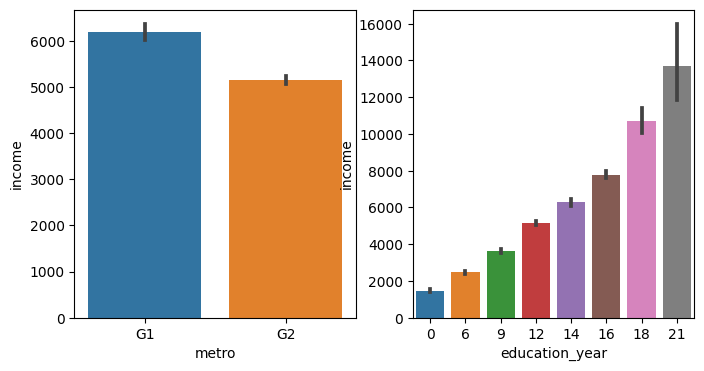

In [80]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.barplot(x='metro', y='income',data=df) # 범주형 데이터인 metro 열을 barplot으로 표현
plt.subplot(1,2,2)
sns.barplot(x='education_year', y='income',data=df) # 
plt.show()

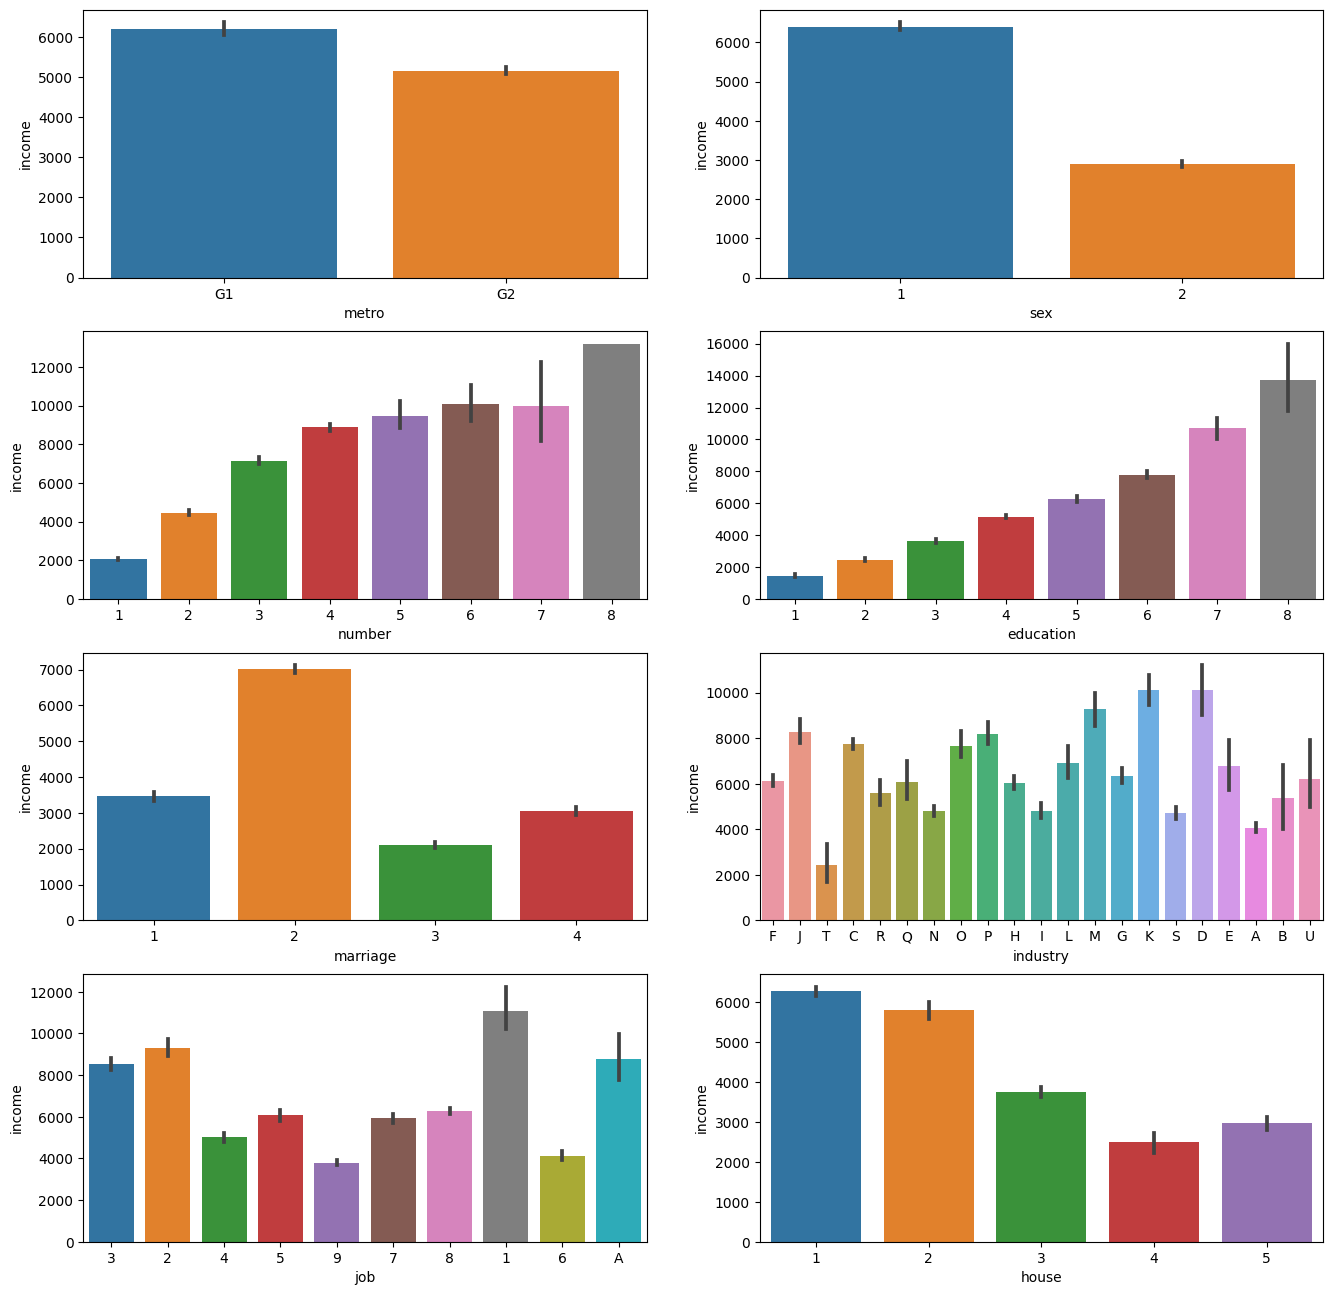

In [81]:
# target 데이터가 income이므로 y축, 즉 종속변수에 income을 두고 x축에 다른 데이터들을 두어 관계성을 파악해볼 수 있도록 시각화 했다.
plt.figure(figsize=(16,16))
plt.subplot(4,2,1)                              # subplot에 4행 2열로 설정하고 순서대로 1, 2, 3...8까지 할당
sns.barplot(x='metro', y='income',data=df)
plt.subplot(4,2,2)
sns.barplot(x='sex', y='income',data=df)
plt.subplot(4,2,3)
sns.barplot(x='number', y='income',data=df)
plt.subplot(4,2,4)
sns.barplot(x='education', y='income',data=df)
plt.subplot(4,2,5)
sns.barplot(x='marriage', y='income',data=df)
plt.subplot(4,2,6)
sns.barplot(x='industry', y='income',data=df)
plt.subplot(4,2,7)
sns.barplot(x='job', y='income',data=df)
plt.subplot(4,2,8)
sns.barplot(x='house', y='income',data=df)
plt.show()                                      # 전체 표를 출력

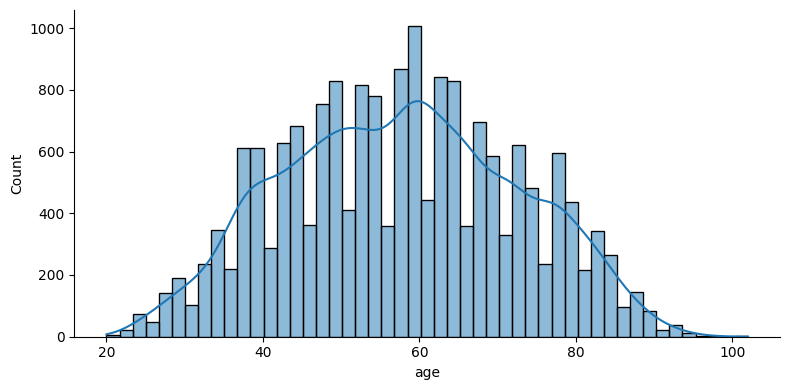

In [82]:
# < displot의 옵션 >
# kde(kernel density estimate line): 커널 밀도 함수
# height : 그래프의 높이 (세로 길이)
# aspect : 그래프의 가로 세로 비율,     ex) aspect=2 --> 가로가 세로에 2배

sns.displot(df.age, height=4, aspect=2, kde=True) 
plt.show()

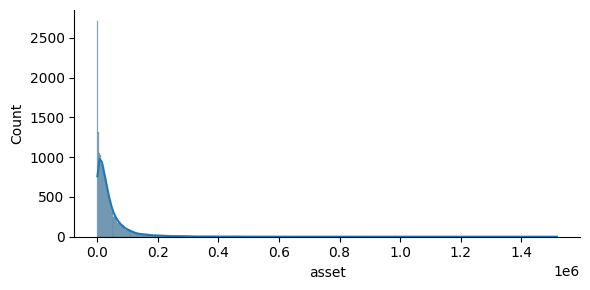

In [83]:
sns.displot(df.asset, height=3, aspect=2, kde=True)
plt.show()

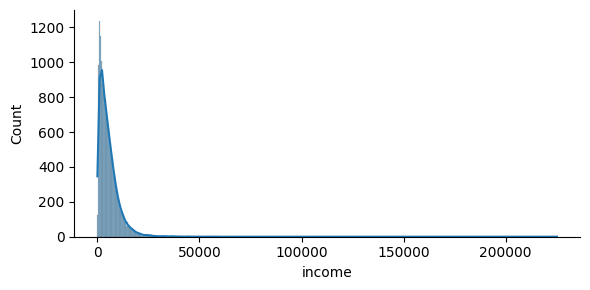

In [84]:
sns.displot(df.income, height=3, aspect=2, kde=True)
plt.show()

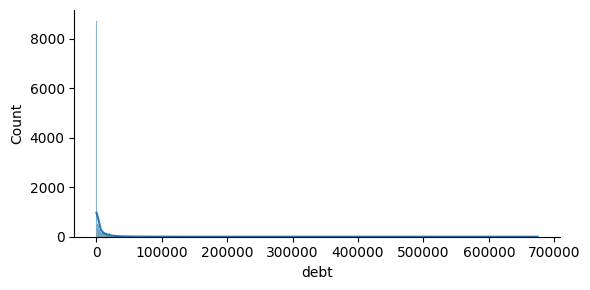

In [85]:
sns.displot(df.debt, height=3, aspect=2, kde=True)
plt.show()

numerical data를 displot으로 찍어본 결과, 한쪽으로 치우쳐 있는 것을 확인할 수 있다 --> log변환이나 스케일링이 필요 

그런데 log변환은 0 이하의 값에 적용될 수 없다. 따라서 log변환하기 전에 0이하의 값이 얼마나 있는지 파악해서   
얼마 없는 경우에는 무시하고 log변환을 하고(0이하의 데이터는 버리는 것으로)   
0이하가 많은 경우에는 다른 처리가 필요하다 

In [86]:
(df['income'] <= 0).sum()

1

In [87]:
(df['asset'] <= 0).sum()

0

In [88]:
(df['debt'] <= 0).sum() # log변환을 적용할 수 없는 경우

7220

In [89]:
# 0이하의 데이터가 거의 없는 income, asset의 경우 log변환을 수행
df['log_income']=np.log(df['income'])       # numpy의 log를 사용해서 변환한 열을 만들고
df.drop(columns=['income'], inplace=True)   # 기존의 열을 제거
df['log_asset']=np.log(df['asset'])
df.drop(columns=['asset'], inplace=True)

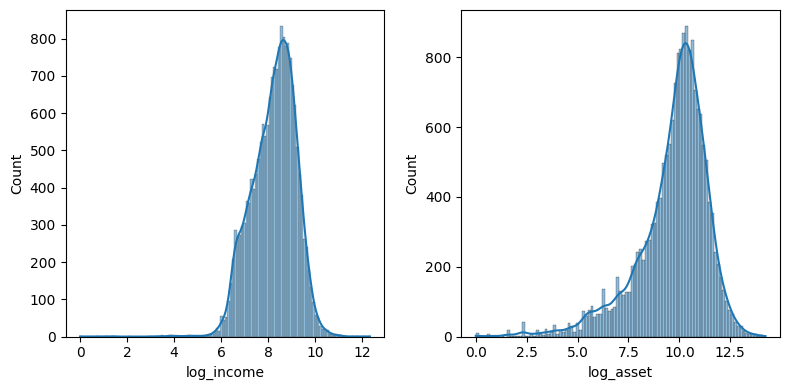

In [90]:
# histplot: 히스토그램을 그리는데 사용, bins로 구간을 나눌 수 있고 kde 옵션 가능
# displot: 다양한 종류의 분포 플롯을 그리는데 사용 --> kind= "~~"를 사용해서 hist, kde, ecdf 등 다양한 분포로 그릴 수 있음

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df.log_income,kde=True)
plt.subplot(1,2,2)
sns.histplot(df.log_asset,kde=True)
plt.tight_layout()
plt.show()

# 로그 변환 이전에는 좌측으로 치우처져서 제대로 파악되지 않았던 데이터가 정규 분포에 가까운 형태로 시각화되는 것을 확인할 수 있다.

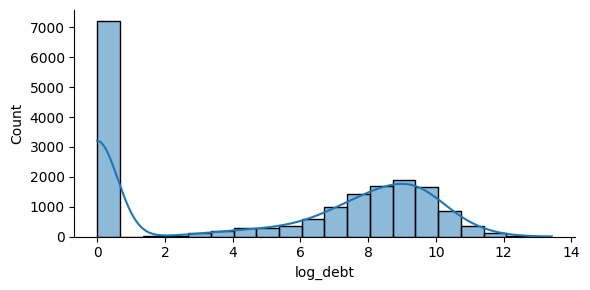

In [91]:
# abs(df['debt'].min()+1) : 최솟값에 1을 더하고 절댓값을 취한다 --> 로그 변환을 적용할 때 0 또는 음수 값을 피하기 위함
df['log_debt']=np.log(df['debt']+abs(df['debt'].min()+1)) 
sns.displot(df.log_debt, height=3, aspect=2, kde=True)
plt.show()

In [92]:
(df['debt'] <= 0).sum()

7220

In [93]:
df['debt'].min()

0

In [94]:
(df['log_debt'] <= 0).sum() # 전혀 문제가 해결된 것이 아니지 않나..?

7220

In [95]:
# h_debt = has debt
df['h_debt']=0  # h_debt 열을 추가하고 모두 0으로 초기화
df.loc[df['debt']>0, 'h_debt']=1 # df.loc[조건, 열] : df['debt']가 양수인 열에 대해 h_debt에 1을 할당
df.drop(columns=['debt'], inplace=True) # 기존 debt열은 삭제

결측치 처리

In [96]:
df.isnull().sum()

metro                0
sex                  0
age                  0
number               0
education            0
marriage             0
income_d             0
industry          4850
job               4850
house                0
education_year       0
log_income           0
log_asset            0
log_debt             0
h_debt               0
dtype: int64

industry와 job에 4850개나 결측치가 있는데 이를 다 제거하기에는 너무 많은 양이라 다른 값으로 대체하기로 한다 

In [97]:
#df['industry'].fillna('no_I', inplace=True)
#df['job'].fillna('0', inplace=True)
df=df.fillna('NaN') # NaN값을 넣어놓는다 

이상치 처리

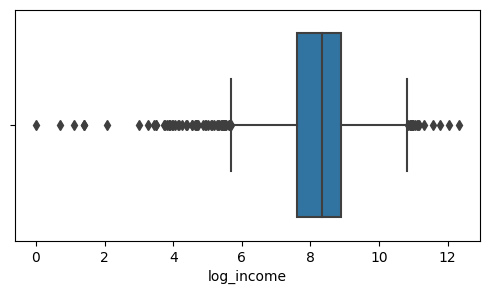

In [98]:
#income
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['log_income']) # boxplot으로 이상치를 체크해본다 
plt.show()

In [99]:
# IQR을 기반으로 79개의 데이터가 범위 안에 들지 않는다, 즉 이상치라는 것을 확인했다
income_Q1 = df['log_income'].quantile(0.25)
income_Q3 = df['log_income'].quantile(0.75)
income_IQR = income_Q3 - income_Q1

income_lower_bound = income_Q1 - 1.5 * income_IQR
income_upper_bound = income_Q3 + 1.5 * income_IQR

((df['log_income'] < income_lower_bound) | (df['log_income'] > income_upper_bound)).sum()

79

In [100]:
# 79개의 데이터를 제외한 df를 재할당하여 79개의 데이터를 제거
df = df[(df['log_income'] >= income_lower_bound) & (df['log_income'] <= income_upper_bound)]

In [101]:
# asset도 이상치가 900개 정도이긴 하지만 제거하기로 했다
asset_Q1 = df['log_asset'].quantile(0.25)
asset_Q3 = df['log_asset'].quantile(0.75)
asset_IQR = asset_Q3 - asset_Q1

asset_lower_bound = asset_Q1 - 1.5 * asset_IQR
asset_upper_bound = asset_Q3 + 1.5 * asset_IQR

((df['log_asset'] < asset_lower_bound) | (df['log_asset'] > asset_upper_bound)).sum()

899

In [102]:
df = df[(df['log_asset'] >= asset_lower_bound) & (df['log_asset'] <= asset_upper_bound)]

In [103]:
# debt는 이상치가 없었다 --> 
debt_Q1 = df['log_debt'].quantile(0.25)
debt_Q3 = df['log_debt'].quantile(0.75)
debt_IQR = debt_Q3 - debt_Q1

debt_lower_bound = debt_Q1 - 1.5 * debt_IQR
debt_upper_bound = debt_Q3 + 1.5 * debt_IQR

((df['log_debt'] < debt_lower_bound) | (df['log_debt'] > debt_upper_bound)).sum()

0

누락 변수 추가 및 부적합 변수 제거

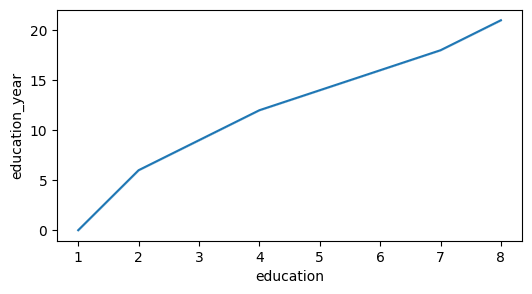

In [104]:
plt.figure(figsize=(6,3))
sns.lineplot(data=df, x='education', y='education_year')
plt.show()

In [105]:
df['education'].corr(df['education_year']) # education과 education_year 사이의 상관계수를 파악 (1에 가까울수록 양의 연관성)

0.9777877321039566

In [106]:
df=df.drop(['education'],axis=1) # 상관계수가 너무 높아 불필요하기 때문에 education을 제거

In [107]:
df=df.drop(["income_d",'number'], axis=1)

인코딩

In [108]:
df.columns

Index(['metro', 'sex', 'age', 'marriage', 'industry', 'job', 'house',
       'education_year', 'log_income', 'log_asset', 'log_debt', 'h_debt'],
      dtype='object')

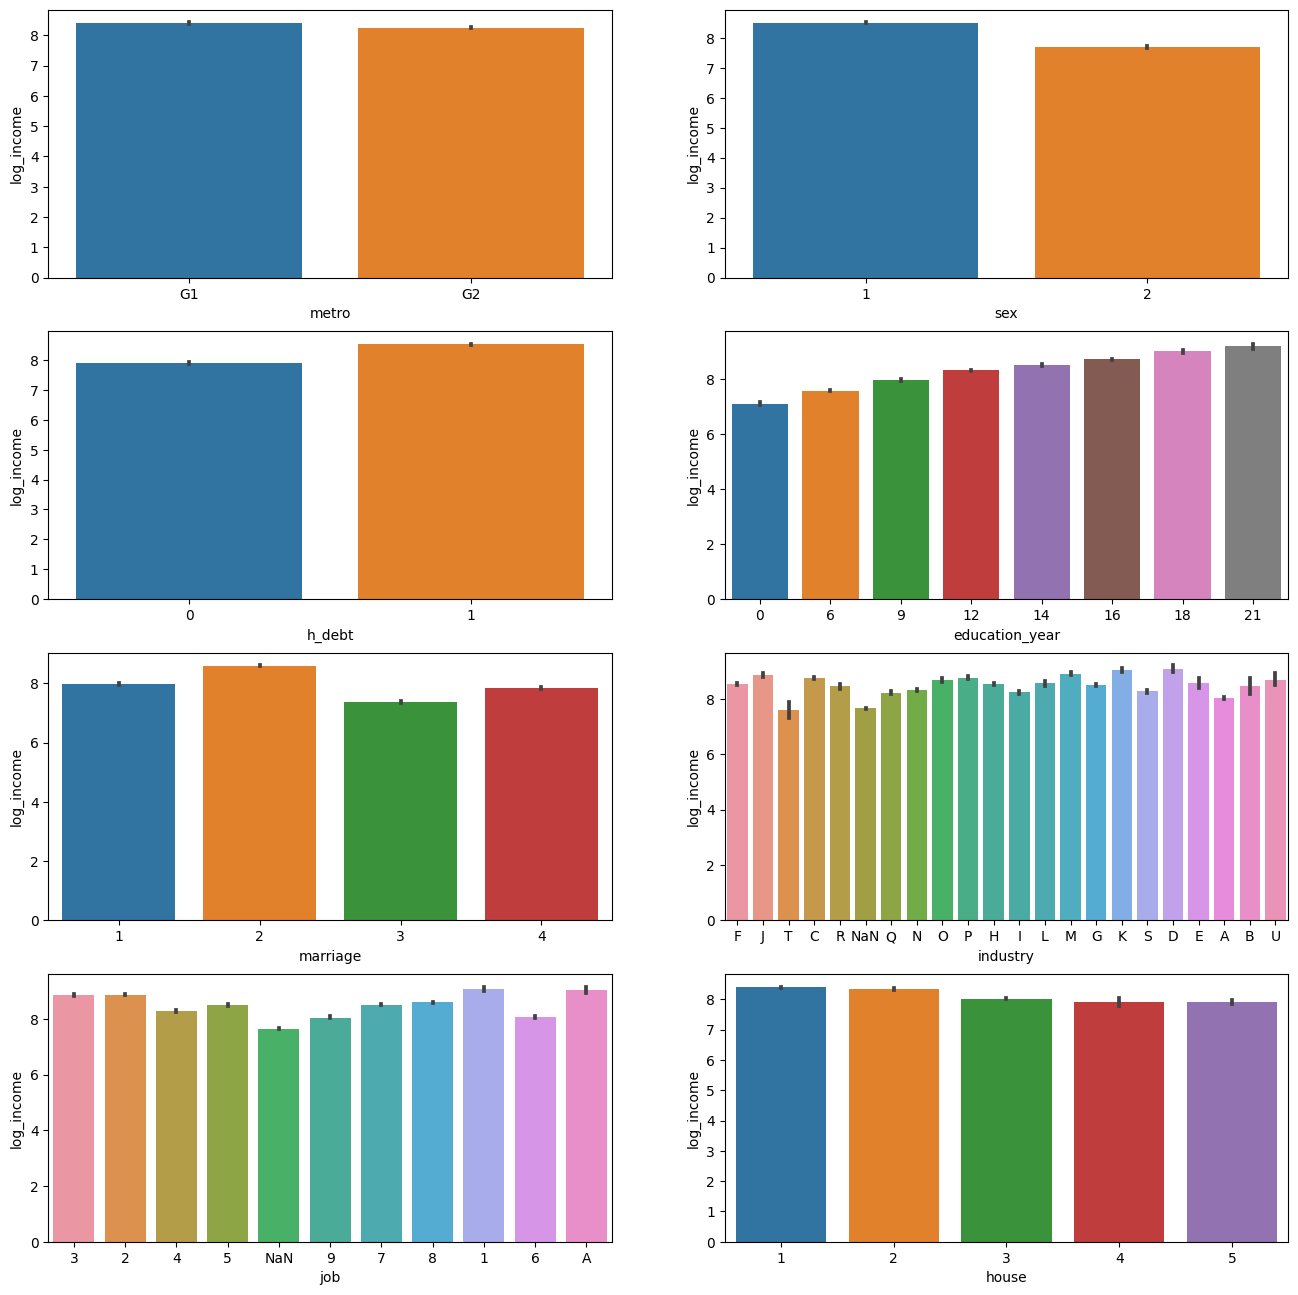

In [109]:
plt.figure(figsize=(16,16))
plt.subplot(4,2,1)
sns.barplot(x='metro', y='log_income',data=df)
plt.subplot(4,2,2)
sns.barplot(x='sex', y='log_income',data=df)
plt.subplot(4,2,3)
sns.barplot(x='h_debt', y='log_income',data=df)
plt.subplot(4,2,4)
sns.barplot(x='education_year', y='log_income',data=df)
plt.subplot(4,2,5)
sns.barplot(x='marriage', y='log_income',data=df)
plt.subplot(4,2,6)
sns.barplot(x='industry', y='log_income',data=df)
plt.subplot(4,2,7)
sns.barplot(x='job', y='log_income',data=df)
plt.subplot(4,2,8)
sns.barplot(x='house', y='log_income',data=df)
plt.show()

In [110]:
#label encoding
df=df.applymap(lambda x : 0 if x == 'G1' else(1 if x=='G2' else x)) # G1이면 0을 넣고 G2이면 1 그 나머지이면 x로 넣는다
df.sex=df.sex.apply(lambda x : 0 if x == 1 else(1 if x==2 else x))  # sex는 1, 2로 되어 있어서 1은 0으로 2는 1로 바꾸어주었다

In [111]:
#one-hot encoding
df=pd.get_dummies(data=df, columns=["marriage","industry","job","house"], drop_first=True, dtype=int) # columns에 넣어준 열에만 one-hot encoding을 적용
                                                                                           # drop_first로 첫 번째 범주를 제거 --> (원래 범주 수 - 1)개로 더미 변수 생성
                                                                                           # 이렇게 하면 다중 공선성 문제를 방지하고 모델의 복잡성을 줄일 수 있다

In [112]:
df.columns

Index(['metro', 'sex', 'age', 'education_year', 'log_income', 'log_asset',
       'log_debt', 'h_debt', 'marriage_2', 'marriage_3', 'marriage_4',
       'industry_B', 'industry_C', 'industry_D', 'industry_E', 'industry_F',
       'industry_G', 'industry_H', 'industry_I', 'industry_J', 'industry_K',
       'industry_L', 'industry_M', 'industry_N', 'industry_NaN', 'industry_O',
       'industry_P', 'industry_Q', 'industry_R', 'industry_S', 'industry_T',
       'industry_U', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_A', 'job_NaN', 'house_2', 'house_3', 'house_4',
       'house_5'],
      dtype='object')

모델 생성

In [113]:
# 독립변수와 종속변수 분리
y=df.log_income                     # 종속 변수(income)을 따로 떼고
X=df.drop(['log_income'],axis=1)    # 기존 데이터에서는 종속 변수를 제거해서 모델 학습에 종속 변수가 포함되지 않도록 한다

In [114]:
# train 데이터와 test 데이터를 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [115]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
X_train_con = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X_train_con)
result1 = model1.fit()

print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:             log_income   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     487.7
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:05:27   Log-Likelihood:                -10802.
No. Observations:               13668   AIC:                         2.169e+04
Df Residuals:                   13623   BIC:                         2.203e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.5127      0.097     56.

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()  # 선형 회귀 모델을 선택
model.fit(X_train, y_train) # train 데이터로 학습(fit)

print("계수 : \n", model.coef_)
print("절편 : ", model.intercept_)
print('훈련 데이터의 점수 : {:.3f}'.format(model.score(X_train, y_train)))  # train 데이터로 예측한 점수
print('테스트 데이터의 점수 : {:.3f}'. format(model.score(X_test, y_test))) # test 데이터로 예측한 점수

y_pred = model.predict(X_test) # X test로 예측해서 y_pred로 저장
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # y_test(실제값)과 y_pred(예측값)의 차를 가지고 rmse를 계산
print('RMSE : {:.3f}'.format(rmse))                # rmse 출력 --> 모델의 최종 성능 지표 (0에 가까울수록 좋다)

계수 : 
 [ 0.01683277 -0.09341693 -0.00723198  0.02674291  0.25710425  0.00499838
  0.04815053  0.49890157  0.14906186  0.20061107  0.37262291  0.24412072
  0.36639538  0.18561855  0.14856096  0.12710423  0.13390284  0.05592126
  0.18687803  0.39111364  0.02640201  0.15077585  0.12821526 -0.22793102
  0.24085431  0.14958194  0.10852155  0.05271361  0.01657219 -0.03994353
  0.38606176 -0.06973521 -0.10463202 -0.15258148 -0.22268907 -0.3008285
 -0.18477376 -0.13060528 -0.25613873 -0.08501838 -0.22793102 -0.03567332
  0.19944712  0.26248885  0.16510953]
절편 :  5.512657441130283
훈련 데이터의 점수 : 0.612
테스트 데이터의 점수 : 0.611
RMSE : 0.537
